In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import operator
import keras
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from keras.utils.np_utils import to_categorical

In [2]:
# load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train.shape (60000, 28, 28)
y_train.shape (60000,)


In [3]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(60000))
x_train = x_train[shuffled_indices, :, :]
y_train = y_train[shuffled_indices]

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, kernel_regularizer='l2', activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [5]:
# train_score
train_loss = []
val_loss = []

# test_score
test_score_loss = []
test_score_acc = []

# hyper-parameter
learning_rate=1e-3
print("learning_rate\n", learning_rate)

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',  metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        verbose=1,
    )

history = model.fit(x_train, y_train, callbacks=[es], shuffle=True, validation_split=0.20, 
                    verbose=1, epochs=200)

train_loss.append(history.history['loss'])
val_loss.append(history.history['val_loss'])

# obtain current accuracy
loss, acc = model.evaluate(x_test, y_test)
test_score_loss.append(loss)
test_score_acc.append(acc)

learning_rate
 0.001
Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7341 - accuracy: 0.8963 - val_loss: 0.4667 - val_accuracy: 0.9255
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4560 - accuracy: 0.9234 - val_loss: 0.4175 - val_accuracy: 0.9347
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4102 - accuracy: 0.9332 - val_loss: 0.4479 - val_accuracy: 0.9172
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3820 - accuracy: 0.9364 - val_loss: 0.4103 - val_accuracy: 0.9291
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3604 - accuracy: 0.9411 - val_loss: 0.3706 - val_accuracy: 0.9388
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3424 - accuracy: 0.9448 - val_loss: 0.3671 - val_accuracy: 0.9335
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3280 - accuracy: 0.9457 - val_

In [8]:
print('test_score_loss\n',test_score_loss)
print('test_score_acc\n',test_score_acc)

test_score_loss
 [0.25256583094596863]
test_score_acc
 [0.9550999999046326]


Text(0, 0.5, 'Test Loss')

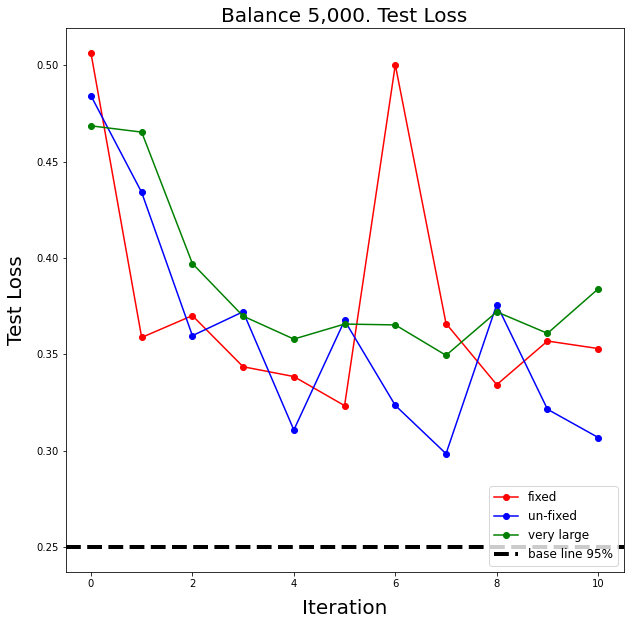

In [31]:
validation_20_fixed_loss = [0.5063990950584412, 0.35876408219337463, 0.37010684609413147, 
                            0.34357377886772156, 0.33848538994789124, 0.3233814239501953, 
                            0.500221848487854, 0.3660040497779846, 0.3342558741569519, 
                            0.3569081723690033, 0.35301414132118225]

unfixed_loss = [0.48419755697250366, 0.43403545022010803, 0.35969915986061096, 0.3721000850200653, 0.3107736110687256, 0.3675651252269745, 0.32349807024002075, 0.29845792055130005, 0.37584224343299866, 0.3215092718601227, 0.3068561851978302]


very_large_loss = [0.46856293082237244, 0.4653012752532959, 0.3971247673034668, 
                   0.3698405623435974, 0.35792580246925354, 0.3657178282737732, 
                   0.3652760088443756, 0.34949037432670593, 0.3720564544200897, 
                   0.3608984053134918, 0.38397732377052307]

#base_loss = [0.25256583094596863]


axis_ = range(11)


plt.figure(figsize=(10,10))

plt.title("Balance 5,000. Test Loss", size=20)
plt.plot(axis_, validation_20_fixed_loss, marker='o', label='fixed', c='red')
plt.plot(axis_, unfixed_loss, marker='o', label='un-fixed', c='blue')
plt.plot(axis_, very_large_loss, marker='o', label='very large', c='green')
plt.axhline(0.25, label='base line 95%', c='black', linewidth=4, linestyle='--')
plt.legend(fontsize=12, loc=4)
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 20})
plt.ylabel('Test Loss', labelpad=10, fontdict={'size' : 20})



C:\Users\PARK\AppData\Local\Temp\ipykernel_20808\3595193185.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])


[Text(0, 0.87, '0.87'),
 Text(0, 0.88, '0.88'),
 Text(0, 0.89, '0.89'),
 Text(0, 0.9, '0.90'),
 Text(0, 0.91, '0.91'),
 Text(0, 0.92, '0.92'),
 Text(0, 0.9299999999999999, '0.93'),
 Text(0, 0.94, '0.94'),
 Text(0, 0.95, '0.95'),
 Text(0, 0.96, '0.96')]

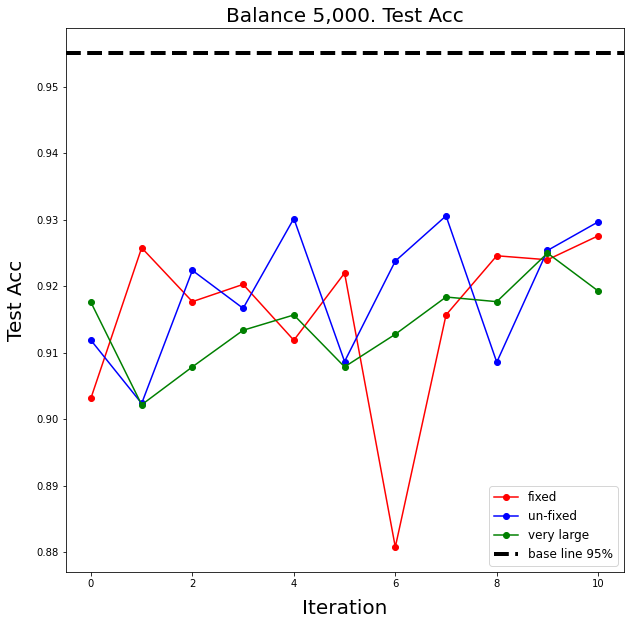

In [30]:
validation_20_fixed_acc = [0.9031999707221985, 0.9258000254631042, 0.9176999926567078, 
                       0.9203000068664551, 0.911899983882904, 0.921999990940094, 
                       0.8808000087738037, 0.9157000184059143, 0.9246000051498413, 
                       0.9240000247955322, 0.9276000261306763]

unfixed_acc = [0.911899983882904, 0.902400016784668, 0.9223999977111816, 0.916700005531311, 0.9301999807357788, 0.9086999893188477, 0.923799991607666, 0.9305999875068665, 0.9085999727249146, 0.9254000186920166, 0.9297000169754028]


very_large_acc =[0.9175999760627747, 0.9021999835968018, 0.9078999757766724, 
                 0.9133999943733215, 0.9157000184059143, 0.9078999757766724, 
                 0.9128000140190125, 0.91839998960495, 0.9176999926567078, 
                 0.925000011920929, 0.9193000197410583]

base_acc = [0.9550999999046326]


plt.figure(figsize=(10,10))

plt.title("Balance 5,000. Test Acc", size=20)
plt.plot( validation_20_fixed_acc, marker='o', label='fixed', c='red')
plt.plot( unfixed_acc, marker='o', label='un-fixed', c='blue')
plt.plot( very_large_acc, marker='o', label='very large', c='green')
plt.axhline(base_acc, label='base line 95%', c='black', linewidth=4, linestyle='--')
plt.legend(fontsize=12, loc=4)
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 20})
plt.ylabel('Test Acc', labelpad=10, fontdict={'size' : 20})
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])

C:\Users\PARK\AppData\Local\Temp\ipykernel_20808\2448680944.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])


[Text(0, 0.9, '0.90'),
 Text(0, 0.91, '0.91'),
 Text(0, 0.92, '0.92'),
 Text(0, 0.93, '0.93'),
 Text(0, 0.9400000000000001, '0.94'),
 Text(0, 0.9500000000000001, '0.95'),
 Text(0, 0.96, '0.96')]

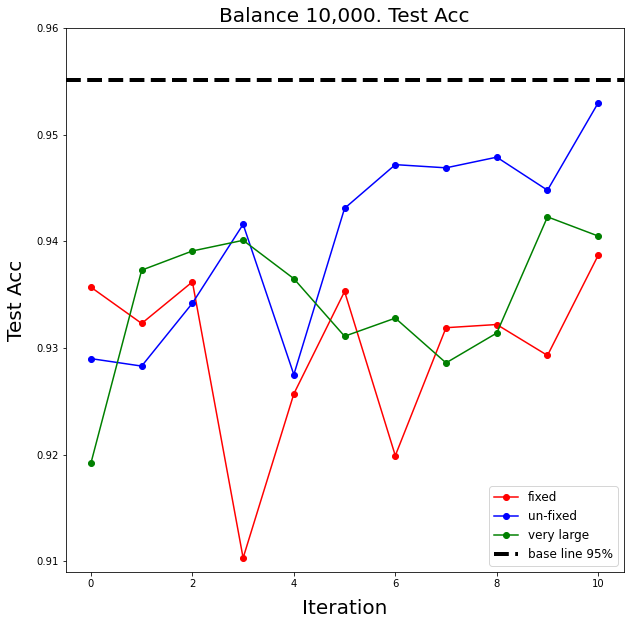

In [29]:
import matplotlib.pyplot as plt

validation_20_fixed_acc = [0.935699999332428, 0.9322999715805054, 0.9362000226974487, 0.9103000164031982, 0.9257000088691711, 0.9352999925613403, 0.9199000000953674, 0.9319000244140625, 0.932200014591217, 0.9293000102043152, 0.9387000203132629]

unfixed_acc = [0.9290000200271606, 0.9283000230789185, 0.9341999888420105, 0.9416000247001648, 0.9275000095367432, 0.9430999755859375, 0.9472000002861023, 0.9469000101089478, 0.9478999972343445, 0.9448000192642212, 0.953000009059906]


very_large_acc = [0.9192000031471252, 0.9373000264167786, 0.9391000270843506, 0.9401000142097473, 0.9365000128746033, 0.9311000108718872, 0.9327999949455261, 0.928600013256073, 0.9314000010490417, 0.942300021648407, 0.940500020980835]

base_acc = [0.9550999999046326]

plt.figure(figsize=(10,10))

plt.title("Balance 10,000. Test Acc", size=20)
plt.plot(validation_20_fixed_acc, marker='o', label='fixed', c='red')
plt.plot(unfixed_acc, marker='o', label='un-fixed', c='blue')
plt.plot(very_large_acc, marker='o', label='very large', c='green')
plt.axhline(base_acc, label='base line 95%', c='black', linewidth=4, linestyle='--')
plt.legend(fontsize=12, loc=4)
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 20})
plt.ylabel('Test Acc', labelpad=10, fontdict={'size' : 20})
plt.ylim(0.909, 0.96)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])

C:\Users\PARK\AppData\Local\Temp\ipykernel_20808\1711605124.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])


[Text(0, 0.75, '0.75'),
 Text(0, 0.775, '0.78'),
 Text(0, 0.8, '0.80'),
 Text(0, 0.825, '0.82'),
 Text(0, 0.85, '0.85'),
 Text(0, 0.875, '0.88'),
 Text(0, 0.9, '0.90'),
 Text(0, 0.925, '0.93'),
 Text(0, 0.95, '0.95'),
 Text(0, 0.975, '0.97')]

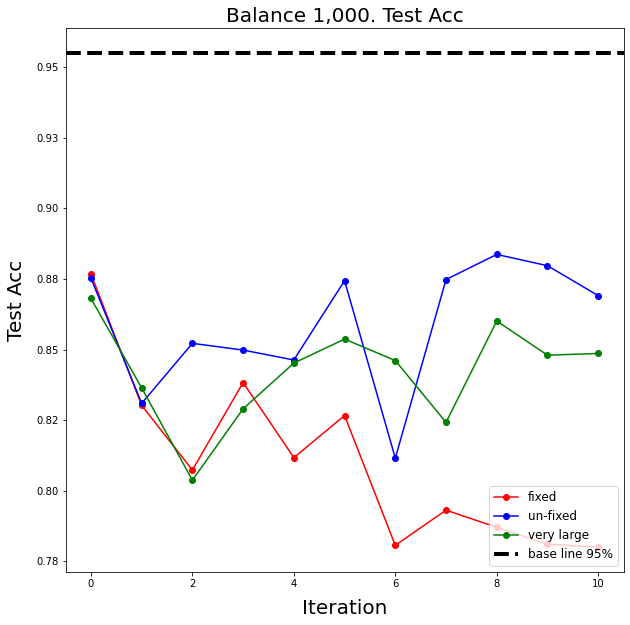

In [21]:
validation_20_fixed_acc = [0.876800000667572, 0.8302000164985657, 0.8072999715805054, 0.8382999897003174, 0.8116999864578247, 0.8266000151634216, 0.7806000113487244, 0.7930999994277954, 0.7870000004768372, 0.781000018119812, 0.7799999713897705]


unfixed_acc = [0.8752999901771545, 0.8309000134468079, 0.8521999716758728, 0.8497999906539917, 0.8463000059127808, 0.8744000196456909, 0.8115000128746033, 0.8748000264167786, 0.8837000131607056, 0.8797000050544739, 0.8690999746322632]


very_large_acc = [0.8680999875068665, 0.8363999724388123, 0.8036999702453613, 0.8289999961853027, 0.8452000021934509, 0.8536999821662903, 0.8460999727249146, 0.8241999745368958, 0.8600999712944031, 0.8479999899864197, 0.8485999703407288]
base_acc = [0.9550999999046326]

plt.figure(figsize=(10,10))

plt.title("Balance 1,000. Test Acc", size=20)
plt.plot( validation_20_fixed_acc, marker='o', label='fixed', c='red')
plt.plot( unfixed_acc, marker='o', label='un-fixed', c='blue')
plt.plot( very_large_acc, marker='o', label='very large', c='green')
plt.axhline(base_acc, label='base line 95%', c='black', linewidth=4, linestyle='--')
plt.legend(fontsize=12, loc=4)
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 20})
plt.ylabel('Test Acc', labelpad=10, fontdict={'size' : 20})
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])

C:\Users\PARK\AppData\Local\Temp\ipykernel_20808\3920752027.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])


[Text(0, 0.6000000000000001, '0.60'),
 Text(0, 0.6500000000000001, '0.65'),
 Text(0, 0.7000000000000001, '0.70'),
 Text(0, 0.7500000000000001, '0.75'),
 Text(0, 0.8, '0.80'),
 Text(0, 0.8500000000000001, '0.85'),
 Text(0, 0.9000000000000001, '0.90'),
 Text(0, 0.9500000000000002, '0.95'),
 Text(0, 1.0, '1.00')]

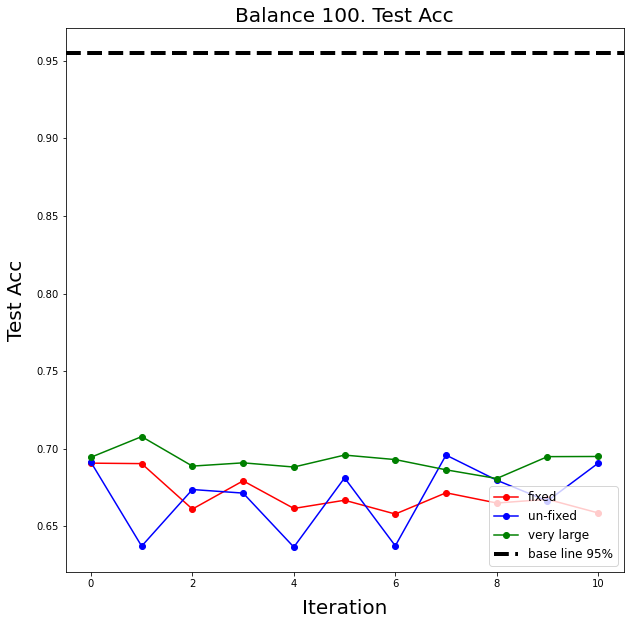

In [22]:
validation_20_fixed_acc = [0.6906999945640564, 0.6904000043869019, 0.6610999703407288, 0.6793000102043152, 0.6614999771118164, 0.6668000221252441, 0.6578999757766724, 0.6715999841690063, 0.6650000214576721, 0.6674000024795532, 0.6585999727249146]



unfixed_acc = [0.6912999749183655, 0.6371999979019165, 0.6736999750137329, 0.6714000105857849, 0.6366000175476074, 0.6812000274658203, 0.6373999714851379, 0.695900022983551, 0.6797000169754028, 0.6662999987602234, 0.6906999945640564]


very_large_acc = [0.6945000290870667, 0.7077999711036682, 0.6887999773025513, 0.6909000277519226, 0.6881999969482422, 0.695900022983551, 0.6930000185966492, 0.6863999962806702, 0.6808000206947327, 0.6948999762535095, 0.6949999928474426]
base_acc = [0.9550999999046326]

plt.figure(figsize=(10,10))

plt.title("Balance 100. Test Acc", size=20)
plt.plot(validation_20_fixed_acc, marker='o', label='fixed', c='red')
plt.plot( unfixed_acc, marker='o', label='un-fixed', c='blue')
plt.plot( very_large_acc, marker='o', label='very large', c='green')
plt.axhline(base_acc, label='base line 95%', c='black', linewidth=4, linestyle='--')
plt.legend(fontsize=12, loc=4)
plt.xlabel('Iteration', labelpad=10, fontdict={'size' : 20})
plt.ylabel('Test Acc', labelpad=10, fontdict={'size' : 20})
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])